#Catalytic Reaction in  Bubbling Fluidised bed (BFB) (Group 9)

by Ruofan Shi, Minghao Liang, Srinivas Gudipudi

In [ ]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define all the constant of the BFB system. 

Data from levenspiel

He did the following assumption for the fast bubble BFB:

Assumption #1: Spherical Bubble 

Assumption #2: Emulsion Stays at minimum fluidization conditions

Assumption #3: Ignore flow of gas through cloud phase and emulsion phase

In [ ]:
#constants


u0=0.3 #Inlet gas velocity (m/s)
D=2  #Diameter of fluidized bed (m)
umf=0.03  #minimum fluidization flow rate (m/s)
e_mf=0.5  #fraction of void in minimum fluidization
W=7000   #Catalyst weight (kg)
rho_s=2000 #Catalyst density (kg/m^3)
k_3prime=0.8 #Reaction rate (m^3/m^3/s)
CA0=100 #initial reactant concentration (mol/m^3)
Dffs=20*10**(-6) #diffusivity (m^2/s)
alpha=0.33 #fraction of wake in bubble volume
d_b=0.32 #bubble diameter (m)
g=9.8 #acceleration of gravity (m/s^2)

ubr=0.711*np.sqrt(g*d_b) #bubble rising velocity
#print(ubr)
ub=u0-umf+ubr    #velocity of bubbles
#print(ub)
#print(ub/umf)  #to see whether ub>>umf 
sigma=(u0)/ub   #bed fraction in bubbles (delta)
#print(sigma)
us=alpha*sigma*ub/(1-sigma-alpha*sigma) #down flow of emulsion solids
#print(us)
ue=umf/e_mf-us #rise velocity of emulsion gas
#print(ue) #downward

K_bc=4.5*umf/d_b+5.85*(np.sqrt(Dffs)*g**(1/4))/(d_b**(5/4)) #interchange of gas between bubble and cloud (s^-1)
#print(K_bc)
sig_K_bc=sigma*K_bc #Mass transfer constant between bubble and cloud(s^-1)
#print(sig_K_bc)
K_ce=6.77*np.sqrt(e_mf*Dffs*ubr/d_b**3) #between cloud and emulsion (s^-1)
#print(K_ce)
sig_K_ce=sigma*K_ce #Mass transfer constant between cloud and emulsion(s^-1)
#print(sig_K_ce)

fb=0.001 #from experiment estimation catalyst fraction in bubble
fc=sigma*(1-e_mf)*(3*umf/e_mf/(ubr-umf/e_mf)+alpha) #solid fraction in cloud and wake
#print(fc)
fe=(1-e_mf)*(1-sigma)-fb-fc #solid fraction in emulsion
#print(fe)
ef=1-fb-fc-fe  #fraction of void in bubbling fluidized bed condition

H_BFB=W/rho_s/np.pi/(1-ef)  #height of the reaction column (m)
#print(H_BFB)

kb=fb*k_3prime #reaction rate in bubble
#print(kb)
kc=fc*k_3prime #reaction rate in cloud
#print(kc)
ke=fe*k_3prime #reaction rate in emulsion
#print(ke)

Volume=np.pi*(D/2)**2*H_BFB #volume of the reactor
Vb=4/3*np.pi*(d_b/2)**3 #volume of 1 bubble



# Approach 1 : Literature (Speed Values define by Prof.Li)

The system of ODE's derived by Professor Li in Chapter 8 Reaction Engineering. There are three phases in total. 

### Phase 1
Mass balance in the bubble phase:

$\frac{dC_{ab}}{dt}=-k_bC_{ab}-K_{bc}(C_{ab}-C_{ac})$ 

Then we express use $t=H_{BFB}/u_b$ to substitute $t$

We also know that $H_{BFB}=\int^{H_{BFB}}_0dz$

Then we can derive the following expression for bubble phase:

ODE #1:

$$\frac{dC_{ab}}{dz}=\frac{-k_bC_{ab}-K_{bc}(C_{ab}-C_{ac})}{u_b}$$

### Phase 2

In cloud phase, the speed of cloud and wake can be derived in the following expression $u_c=u_bf_c\delta$ where this result can be obtain from code above.

Same As before we have 

ODE #2:

$$\frac{dC_{ac}}{dz}=\frac{-k_cC_{ac}+K_{bc}(C_{ab}-C_{ac})-K_{ce}(C_{ac}-C_{ae})}{u_bf_c\delta}$$

### Phase 3

In emulsion phase, the speed of emulsion can be derived in the following expression $u_e(1-\delta-f_c\delta)/\delta$

Same as before we have 

ODE #3:

$$\frac{dC_{ae}}{dz}=\frac{-k_eC_{ae}+K_{ce}(C_{ac}-C_{ae})}{u_e(1-\delta-f_c\delta)/\delta}$$

With this expression, we can use the mass transfer coefficient levenspiel defined in chapter 20. These two mass transfer coefficients have unit of $\frac{1}{s}$. I will discuss late about another approach that need to define mass transfer coefficients.


Final Conversion= 50.58840381646525 %


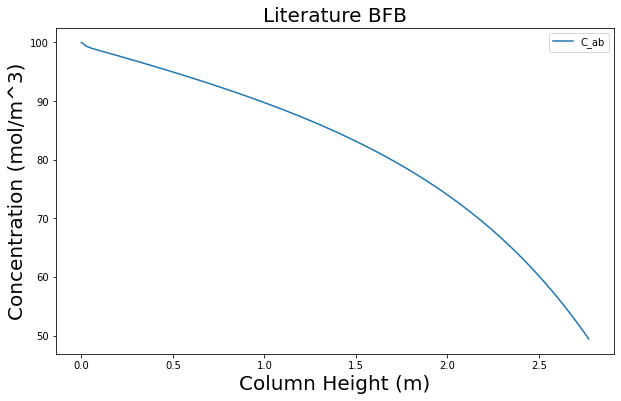

In [ ]:
from scipy.integrate import odeint
def ODE2(CA,V):

  Cab,Cac,Cae=CA#define variables
  Ca0=100 #define initial condition
  sigma=(u0-umf)/(ub-umf*(1+0.25)) #bubble fraction in bed 

  Ca0=Cab+Cac+Cae #Change within concentrations

  
  #Phase 1
  dCabdz=(-kb*Cab-K_bc*(Cab-Cac))/(ub)
  #Phase 2
  dCacdz=(-kc*Cac+K_bc*(Cab-Cac)-K_ce*(Cac-Cae))/(ub*fc*sigma)
  #Phase 3
  dCaedz=(-ke*Cae+K_ce*(Cac-Cae))/(ue*(1-sigma-fc*sigma)/sigma)
  return [dCabdz,dCacdz,dCaedz]
#Span as column height
Vspan=np.linspace(0,H_BFB,100)
#Initial conditions
Y0=[100,0,0]
#solver
sol = odeint(ODE2, Y0,Vspan)
#plot the graph
plt.figure(figsize=(10,6))
plt.plot(Vspan,sol[:,0],label="C_ab")
plt.ylabel("Concentration (mol/m^3)",fontsize=20)
plt.xlabel("Column Height (m)",fontsize=20)
plt.title("Literature BFB",fontsize=20)
plt.legend()
#plt.plot(Vspan,sol[:,1])
#plt.plot(Vspan,sol[:,2])

print("Final Conversion=",(Y0[0]-sol[-1,0])/Y0[0]*100,"%")


The final conversion is around 50%, and this is the numerical explaination of levenspiel using ODE's. The final result is different. Levenspiel have 38% conversion, and professor Li have 50% conversion. 

## influence of gas velocity on final conversion

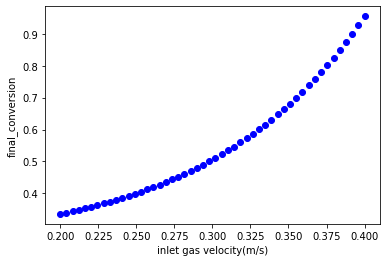

In [ ]:
Num = 50
final_conversion = np.zeros(Num)
for i, u0 in enumerate(np.linspace(0.2, 0.4, Num)):
  ub=u0-umf+ubr
  sigma=(u0)/ub
  sol = odeint(ODE2, Y0,Vspan)
 
  final_conversion[i] = (Y0[0]-sol[-1,0])/Y0[0]
  # plt.plot(Vspan,sol[:,0],label=f"u0 ={u0:1.2f}m/s")
  # print(f"u0={u0:1.2f}m/s, final conversion ={final_conversion[i]*100:1.3f}%")
# plt.legend()
# plt.ylabel("Concentration (mol/m^3)")
# plt.xlabel("Column Height (m)")
# plt.show()
plt.plot(np.linspace(0.2, 0.4, Num), final_conversion, "bo")
plt.ylabel("final_conversion")
plt.xlabel("inlet gas velocity(m/s)")
plt.show()


Final Conversion is proportional to inlet gas velocity for the literature appraoch.

#  Approach 1 literature (Assume all speed the same)

This is an alternative interpretation of the literature ODE's. Same logorithm above, but assume all the speed is the same. Assume the cloud and emulsion phase moving with the bubble phase.

Final Conversion= 45.72375021640461 %


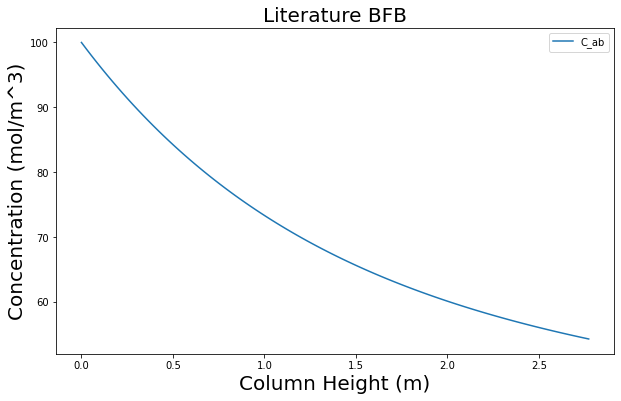

In [ ]:
from scipy.integrate import odeint
def ODE2(CA,V):

  Cab,Cac,Cae=CA#define variables
  Ca0=100 #define initial condition
  sigma=(u0-umf)/(ub-umf*(1+0.25)) #bubble fraction in bed 

  Ca0=Cab+Cac+Cae #Change within concentrations

  #Assuming all have the same speed
  #Phase 1
  dCabdz=(-kb*Cab-K_bc*(Cab-Cac))/ub
  #Phase 2
  dCacdz=(-kc*Cac+K_bc*(Cab-Cac)-K_ce*(Cac-Cae))/(ub)
  #Phase 3
  dCaedz=(-ke*Cae+K_ce*(Cac-Cae))/(ub)
  return [dCabdz,dCacdz,dCaedz]
#Span as column height
Vspan=np.linspace(0,H_BFB,100)
#Initial conditions
Y0=[100,0,0]
#solver
sol = odeint(ODE2, Y0,Vspan)
#plot the graph
plt.figure(figsize=(10,6))
plt.plot(Vspan,sol[:,0],label="C_ab")
plt.ylabel("Concentration (mol/m^3)",fontsize=20)
plt.xlabel("Column Height (m)",fontsize=20)
plt.title("Literature BFB",fontsize=20)
plt.legend()
#plt.plot(Vspan,sol[:,1])
#plt.plot(Vspan,sol[:,2])

print("Final Conversion=",(Y0[0]-sol[-1,0])/Y0[0]*100,"%")


This alternative way have a slightly lower conversion compares to the literature one previously. And the shape is really different in this case because literature appraoch is really speed sensitive. The cloud, and bubble have a positive speed and the emulsion which have been pushed downward by the bubble motion will have a negative speed. Though the emulsion speed is small, it will still affect the answer. But this alternative set of ODE's have a similar shape to the one I derived below.

# Approach 2 Membrane Reactor Like (Median Bubble Size $d_b=0.32$)

### Assumptions (Approach 2)

All the constants above are defined in levenspiel. To figure out the ODE system of this bubble flow bed reactor, we need to make the following assumption:

Assumption #1: All the bubble have identical shapes, and they distribute uniformly inside the column. (We need to use an steady state approach to discuss the reaction interms of column volume)

Assumption #2: All the bubble is spherical, including the cloud and wake outside the bubble. The cloud and wake together formed a thin spherical layer outside the bubble phase. (The bubble should be spherical to easily calculate the volume of each bubble, and consider the cloud and wake as a thin layer can help simplify the shape of the bubble system)

Assumption #3: The reaction will only happen when the bubble is fully developed inside the column. (This means that we don't need to take some under-developed bubble at the column inlet.)

Assumption #4: Both the global mass transfer coefficients are assumed since levenspiel didn't provide any mass transfer coefficient in terms of (m/s).

Assumption #5:Ignore the flow of gas through the cloud or the emulsion since we have a fast bubble model, and the cloud or emulsion volume is small compare to the bubble volume.

Assumption #6: All the initial concentration will be in bubble phase since the reactant enter the column in a gas form.

Assumption #7: The Final product will only in bubble phase. (since we assume that the mass transfer between bubble phase and cloud phase is pretty slow for a fast bubble moving speed.) 

Assumption #8: Constant pressure and Temperature conditions. (Try to make the model simplier without take temperature change and pressure change into account) 

Assumption #9: All the reactions are in Steady state 

### ODE Derivation

### Phase 1
Firstly, the mass balance of bubble phase reaction should be derived. The reactor is sliced into infinite cylindrical disks with radius $\frac{D}{2}$ and the height is $\Delta z$:

The reaction inside one bubble is:  $k_bC_{ab}\frac{4}{3}\pi R_b^3$

The total volume of each disk is: $\pi (\frac{D}{2})^2\Delta z$

Since we know the correlation between bubble volume and bed volumn in terms of $\delta$, We can calculate the number of bubbles in each disk is $\frac{\delta \pi (\frac{D}{2})^2\Delta z}{\frac{4}{3}\pi R_b^3}$

The mass transfer will take place at the surface of the bubble: $K_{bc}(C_{ab}-C_{ac})4\pi R_b^2$

Combine all the equation above we have the following expression for bubble phase reaction:

$0=F_{ab}|_{z}-F_{ab}|_{z+\Delta z}-k_bC_{ab}\frac{4}{3}\pi R_b^3\frac{\delta \pi (\frac{D}{2})^2\Delta z}{\frac{4}{3}\pi R_b^3}-K_{bc}(C_{ab}-C_{ac})4\pi R_b^2\frac{\delta \pi (\frac{D}{2})^2\Delta z}{\frac{4}{3}\pi R_b^3}$

Simplify the expression we have 

ODE #1: $$\frac{dF_{ab}}{dV}=-k_bC_{ab}\delta-K_{bc}(C_{ab}-C_{ac})\frac{3\delta}{R_b}$$

### Phase 2

In the cloud phase, we have reaction in the cloud phase, mass transfer from the bubble phase and mass tranfer outside the cloud phase.

From our assumption above, the cloud phase volume is $\frac{4}{3}\pi (R_c-R_b)^3$ and the surface area of the cloud phase is $4\pi R_c^2$

The mass transfer will take place at both inner and outer layer of the cloud phase: Inner:$K_{bc}(C_{ab}-C_{ac})4\pi R_b^2$, outer:$K_{ce}(C_{ac}-C_{ae})4\pi R_c^2$

Combine all the function in phase 2 we have:

$0=F_{ac}|_{z}-F_{ac}|_{z+\Delta z}-k_cC_{ac}\frac{4}{3}\pi (R_c-R_b)^3\frac{\delta \pi (\frac{D}{2})^2\Delta z}{\frac{4}{3}\pi R_b^3}+K_{bc}(C_{ab}-C_{ac})4\pi R_b^2\frac{\delta \pi (\frac{D}{2})^2\Delta z}{\frac{4}{3}\pi R_b^3}-K_{ce}(C_{ac}-C_{ae})4\pi R_c^2\frac{\delta \pi (\frac{D}{2})^2\Delta z}{\frac{4}{3}\pi R_b^3}$

After simplify the equation above we have:

ODE #2 : $$\frac{dF_{ac}}{dV}=-k_cC_{ac}\delta\frac{(R_c-R_b)^3}{R_b^3}+K_{bc}(C_{ab}-C_{ac})\frac{3\delta}{R_b}-K_{ce}(C_{ac}-C_{ae})\frac{3\delta R_c^2}{R_b^3}$$

### Phase 3

In the emulsion phase, the volume that the emulsion phase occupied is total bed volume minus the bubble volume, The volume of cloud is relatively small so that it can be ignore.

Combine the equation above we can derive the following expression for the emulsion phase: $0=F_{ae}|_{z}-F_{ae}|_{z+\Delta z}-k_eC_{ae}(1-\delta)\pi (\frac{D}{2})^2\Delta z+K_{ce}(C_{ac}-C_{ae})4\pi R_c^2\frac{\delta \pi (\frac{D}{2})^2\Delta z}{\frac{4}{3}\pi R_b^3}$

After simplif the equation above we have:

ODE #3: $$\frac{dF_{ae}}{dV}=-k_eC_{ae}(1-\delta)-K_{ce}(C_{ab}-C_{ac})\frac{3\delta R_c^2}{R_b^3}$$

The Following Example calculation is the median bubble size BFB. All the constants are defined in the code at the beginning. 

Final Conversion= 47.95128383376907 %


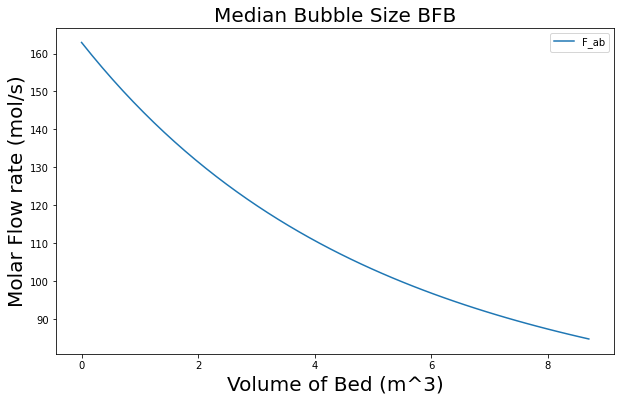

In [ ]:
from scipy.integrate import odeint
def ODE(F,V):
  Nab,Nac,Nae=F #Parameters
  
  Cab=Nab/Vb #Concentration in phase 1
  Cac=Nac/Vb #Concentration in phase 2
  Cae=Nae/Vb #Concentration in phase 3
  Rb=d_b/2 #bubble radius
  Rc=0.01+Rb #Cloud radius assumed by lenvenspiel (thin layer)
  K_ce1=0.00005 # assumed m/s
  K_bc1=0.0004 #assumed m/s
  
  #Phase 1 ODE
  dFabdV=(-kb*Cab*sigma-K_bc1*(Cab-Cac)*3*sigma/(Rb))
  #Phase 2 ODE
  dFacdV=(-kc*Cac*sigma*(Rc-Rb)**3/Rb**3+K_bc1*(Cab-Cac)*3*sigma/(Rb)-K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  #Phase 3 ODE
  dFaedV=(-ke*Cae*(1-sigma)+K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  
  
  return [dFabdV,dFacdV,dFaedV]
#determine span as total volume of bed  
Vspan=np.linspace(0,Volume)
#Initial molar flow rate
FA0=100*ub
#Initial conditions
Y0=[FA0,0,0]
#solver
sol = odeint(ODE, Y0,Vspan)
#plot of product concentration(Only in bubble phase)
plt.figure(figsize=(10,6))
plt.plot(Vspan,sol[:,0],label="F_ab")
plt.ylabel("Molar Flow rate (mol/s)",fontsize=20)
plt.xlabel("Volume of Bed (m^3)",fontsize=20)
plt.title("Median Bubble Size BFB",fontsize=20)
plt.legend()
#plt.plot(Vspan,sol[:,1])
#plt.plot(Vspan,sol[:,2])


print("Final Conversion=",(Y0[0]-sol[-1,0])/Y0[0]*100,"%")


The concentration of bubble phase reactant is decreasing over the column, which is correct and the final conversion is close to the one on levenspiel. We have 43% and levenspiel have 38%. Although we made more assumptions, the final answer is reasonable by comparing difference bubble size.

# Large Bubble Size $d_b=3.2m$

Same ODE's as above

Final Conversion= 17.194842424419324 %


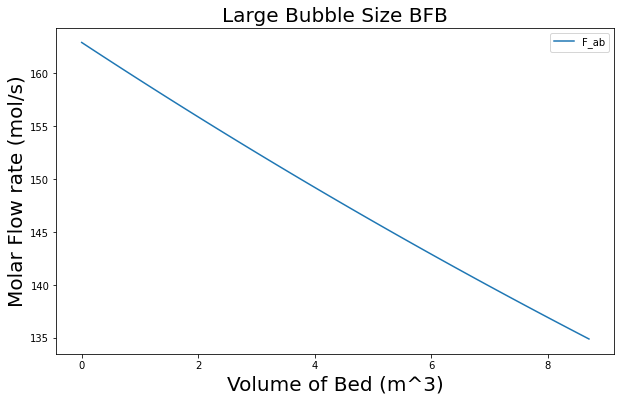

In [ ]:
from scipy.integrate import odeint
def ODE(F,V):
  Nab,Nac,Nae=F #Parameters
  
  Cab=Nab/Vb #Concentration in phase 1
  Cac=Nac/Vb #Concentration in phase 2
  Cae=Nae/Vb #Concentration in phase 3
  Rb=d_b/2*10 #bubble radius
  Rc=0.01+Rb #Cloud radius assumed by lenvenspiel (thin layer)
  K_ce1=0.00005 # assumed m/s
  K_bc1=0.0004 #assumed m/s
  
  #Phase 1 ODE
  dFabdV=(-kb*Cab*sigma-K_bc1*(Cab-Cac)*3*sigma/(Rb))
  #Phase 2 ODE
  dFacdV=(-kc*Cac*sigma*(Rc-Rb)**3/Rb**3+K_bc1*(Cab-Cac)*3*sigma/(Rb)-K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  #Phase 3 ODE
  dFaedV=(-ke*Cae*(1-sigma)+K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  
  
  return [dFabdV,dFacdV,dFaedV]
#determine span as total volume of bed  
Vspan=np.linspace(0,Volume)
#Initial molar flow rate
FA0=100*ub
#Initial conditions
Y0=[FA0,0,0]
#solver
sol = odeint(ODE, Y0,Vspan)
#plot of product concentration(Only in bubble phase)
plt.figure(figsize=(10,6))
plt.plot(Vspan,sol[:,0],label="F_ab")
plt.ylabel("Molar Flow rate (mol/s)",fontsize=20)
plt.xlabel("Volume of Bed (m^3)",fontsize=20)
plt.title("Large Bubble Size BFB",fontsize=20)
plt.legend()
#plt.plot(Vspan,sol[:,1])
#plt.plot(Vspan,sol[:,2])


print("Final Conversion=",(Y0[0]-sol[-1,0])/Y0[0]*100,"%")

Compare to the previous median size bubble, the conversion is only 14% for a large bubble size. For a large bubble size, the final conversion is low. This result is consistent with the literature result in levenspiel. The reaction inside the bubble phase is relatively slow because there are less catalyst inside the bubble phase compare to other phases. This can be appreciate by comparing the value of catalyst fractions $f_b<f_c<f_e$.

# Small Bubble Size ($d_b=0.032m$)

Same ODE's as above

Final Conversion= 90.99635214221425 %


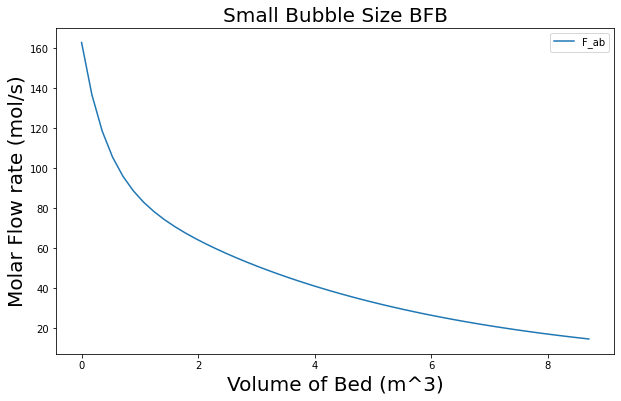

In [ ]:
from scipy.integrate import odeint
def ODE(F,V):
  Nab,Nac,Nae=F #Parameters
  
  Cab=Nab/Vb #Concentration in phase 1
  Cac=Nac/Vb #Concentration in phase 2
  Cae=Nae/Vb #Concentration in phase 3
  Rb=d_b/2/10 #bubble radius
  Rc=0.01+Rb #Cloud radius assumed by lenvenspiel (thin layer)
  K_ce1=0.00005 # assumed m/s
  K_bc1=0.0004 #assumed m/s
  
  #Phase 1 ODE
  dFabdV=(-kb*Cab*sigma-K_bc1*(Cab-Cac)*3*sigma/(Rb))
  #Phase 2 ODE
  dFacdV=(-kc*Cac*sigma*(Rc-Rb)**3/Rb**3+K_bc1*(Cab-Cac)*3*sigma/(Rb)-K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  #Phase 3 ODE
  dFaedV=(-ke*Cae*(1-sigma)+K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  
  
  return [dFabdV,dFacdV,dFaedV]
#determine span as total volume of bed  
Vspan=np.linspace(0,Volume)
#Initial molar flow rate
FA0=100*ub
#Initial conditions
Y0=[FA0,0,0]
#solver
sol = odeint(ODE, Y0,Vspan)
#plot of product concentration(Only in bubble phase)
plt.figure(figsize=(10,6))
plt.plot(Vspan,sol[:,0],label="F_ab")
plt.ylabel("Molar Flow rate (mol/s)",fontsize=20)
plt.xlabel("Volume of Bed (m^3)",fontsize=20)
plt.title("Small Bubble Size BFB",fontsize=20)
plt.legend()
#plt.plot(Vspan,sol[:,1])
#plt.plot(Vspan,sol[:,2])


print("Final Conversion=",(Y0[0]-sol[-1,0])/Y0[0]*100,"%")

For a smaller bubble size, the conversion is larger. And the final conversion is around 86% in this case. This result is correct, since smaller bubble size will result in larger reaction surfaces to react. In addition, this graph have a similar shape of the plug flow reactor at the end of this project. For a infinitely small bubble, the reaction will be same as happenning inside a plug flow reactor, and the conversion will be 99%. 

# Thin layer emulsion assumtion (Median Bubble Size $d_b=0.32$)


Since the bubble move really fast inside the column, we make a further assumption: only a thin layer of emulsion outside the cloud phase will take part into reaction. In this case, both the phase 1 and phase 2 equation will remain the same. The phase 3 expression will be the following:

$$\frac{dF_{ae}}{dV}=-k_eC_{ae}\delta\frac{(R_e-R_c)^3}{R_b^3}+K_{ce}(C_{ac}-C_{ae})\frac{3\delta R_c^2}{R_b^3}$$

Final Conversion= 47.92375454364562 %


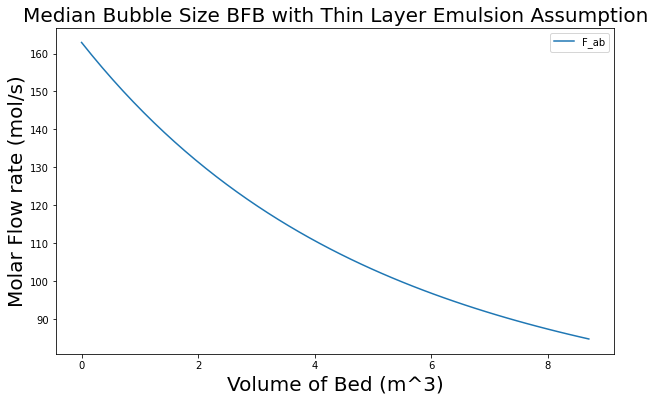

In [ ]:
from scipy.integrate import odeint
def ODE(F,V):
  Nab,Nac,Nae=F #Parameters
  
  Cab=Nab/Vb #Concentration in phase 1
  Cac=Nac/Vb #Concentration in phase 2
  Cae=Nae/Vb #Concentration in phase 3
  Rb=d_b/2 #bubble radius
  Rc=0.01+Rb #Cloud radius assumed by lenvenspiel (thin layer)
  Re=0.01+Rc # assume reacting emulsion radius
  K_ce1=0.00005 # assumed m/s
  K_bc1=0.0004 #assumed m/s
  
  #Phase 1 ODE
  dFabdV=(-kb*Cab*sigma-K_bc1*(Cab-Cac)*3*sigma/(Rb))
  #Phase 2 ODE
  dFacdV=(-kc*Cac*sigma*(Rc-Rb)**3/Rb**3+K_bc1*(Cab-Cac)*3*sigma/(Rb)-K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  #Phase 3 ODE
  dFaedV=(-ke*Cae*sigma*(Re-Rc)**3/Rb**3+K_ce1*(Cac-Cae)*3*sigma*Rc**2/(Rb**3))
  
  
  return [dFabdV,dFacdV,dFaedV]
#determine span as total volume of bed  
Vspan=np.linspace(0,Volume)
#Initial molar flow rate
FA0=100*ub
#Initial conditions
Y0=[FA0,0,0]
#solver
sol = odeint(ODE, Y0,Vspan)
#plot of product concentration(Only in bubble phase)
plt.figure(figsize=(10,6))
plt.plot(Vspan,sol[:,0],label="F_ab")
plt.ylabel("Molar Flow rate (mol/s)",fontsize=20)
plt.xlabel("Volume of Bed (m^3)",fontsize=20)
plt.title("Median Bubble Size BFB with Thin Layer Emulsion Assumption",fontsize=20)
plt.legend()
#plt.plot(Vspan,sol[:,1])
#plt.plot(Vspan,sol[:,2])


print("Final Conversion=",(Y0[0]-sol[-1,0])/Y0[0]*100,"%")


We can see from the final conversion value that it is really close to the conversion value without assmuming the thin emulsion layer. This is because we choose a really small global mass transfer coefficient between cloud phase and emulsion phase, so the reaction in emulsion phase will be little. Since we don't know the global mass transfer coefficient, we can only approach the final conversion by assuming the mass transfer coefficient.

### Important to note that this result can demonstrate a finding from levenspiel that "emulsion phase is starved for gaseous reactants."

Since changing the volume of total emulsion phase reaction, the conversion is only decrease a really small amount.

# PFR Example (For Comparison)

Consider the same reaction inside a plug flow reactor of the same volume, the conversion is about 99% in this reactor. This is for comparison.

The mass balance for PFR: \\
$$\frac{dC_a}{dV} = γ_ar$$  \\
$$r = k_{pfr}C_a, γ = -1 $$ \\
$$\frac{dC_a}{dV} = -k_{pfr}C_a$$  \\

Final Conversion Of PFR= [99.05415324]


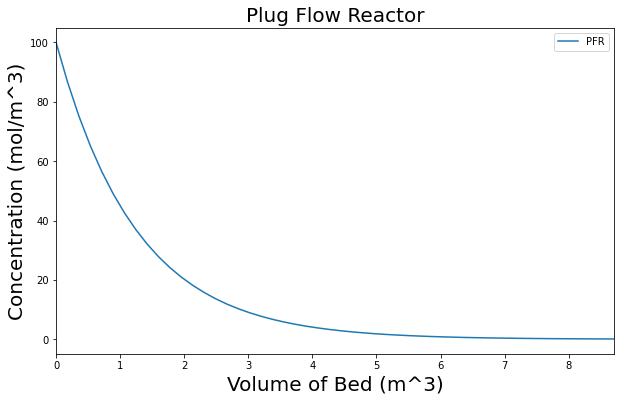

In [ ]:
k_pfr=k_3prime #same k_prime as the reaction
CA0=np.array([100])
Q0=u0*np.pi*(D/2)**2
V_pfr=Volume
def fun_PFR(V,Ca):
    return -k_pfr*Ca
Vspan=np.linspace(0,V_pfr)
sol= solve_ivp(fun_PFR, t_span=(0,V_pfr), y0=CA0,t_eval=Vspan)  



plt.figure(figsize=(10,6))

plt.plot(sol.t,sol.y.T,label="PFR")

plt.xlim([0,V_pfr])
plt.ylabel("Concentration (mol/m^3)",fontsize=20)
plt.xlabel("Volume of Bed (m^3)",fontsize=20)
plt.title("Plug Flow Reactor",fontsize=20)
plt.legend()
print("Final Conversion Of PFR=",(10-sol.y.T[-1])/10*100)

As we can see from the above graph, the plug flow reactor has a similar shape of the bubble reactor examples, which can also demonstrate that as bubble size become infinitely small, we will end up with an plug flow reactor in this case. This result also demonstrate by levenspiel in his analytical solutions.

# Reference

Levenspiel, Octave. Chemical Reaction Engineering, 3rd Edition, Wiley, New York , 1999, pp. 446–465. 

Li, Shaofen, et al. Reaction Engineering, Butterworth-Heinemann, Elsevier, Oxford, United Kingdom, 2017, pp. 380–386. 